<a href="https://colab.research.google.com/github/Justion1234/Deep_Learning_From_Scratch_02/blob/main/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 퍼셉트론

퍼셉트론이란? 

다수의 신호를 입력으로 받아 하나의 신호를 출력하는 것.

실제 전류와 달리 퍼셉트론 신호는 흐른다/안 흐른다(1이나 0)의 두가지 값을 가진다.



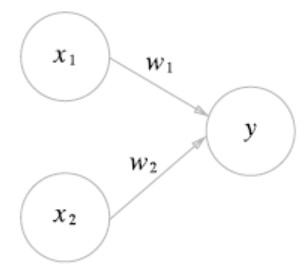


위의 사진은 2개의 신호를 받은 퍼셉트론의 예이다.

x1, x2 : 입력 신호

y는 출력 신호

w1, w2 : 가중치


뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력(이를 '뉴런이 활성화한다'라고 표현)

이 책에서 그 한계를 임계값이라하며, θ기호(세타)로 나타낸다.

퍼셉트론 동작 원리 수식 :

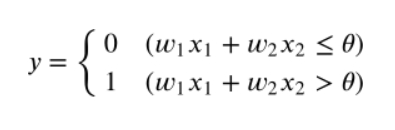

퍼셉트론으로 AND, NAND, OR 논리 회로를 표현할 수 있다.

가장 중요한 점은 퍼셉트론의 구조는 AND, NAND, OR 게이트 모두에서 똑같다. 다른 것은 매개변수(가중치와 임계값)의 값뿐이다.

-------------------------------------------------------------------------------

퍼셉트론 구현하기

In [1]:
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7 #theta : 임계값
  tmp = x1*w1 + x2*w2 #w1, w2 : 가중치
  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1


AND(0, 0)
AND(1, 0)
AND(0, 1)
AND(1, 1)

1

위에서 구현한 AND 게이트는 직관적이고 알기 쉽지만, 신경망 학습을 위해 다른 방식으로 수정하고자한다. Θ 를 -b로 치환하면 퍼셉트론의 동작이 다음과 같은 식으로 됩니다.

b = bias(편향)

y = 0 (b+ w1*x1 + w2*x2  ≤ 0)

y = 1 ( b+ w1*x1 + w2*x2  ≥ 0)

In [2]:
import numpy as np
x = np.array([0, 1])    #     입력
w = np.array([0.5, 0.5])# 가중치
b = -0.7                # 편향
print(w * x)
print(np.sum(w*x))
print(np.sum(w*x) + b) #가중치와 편향을 도입해서 구한 식


[0.  0.5]
0.5
-0.19999999999999996


가중치와 편향을 도입해서 AND 게이트 구현

In [3]:
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w*x) + b #세타 대신 -bias(편향)을 넣어서 구현
  if tmp <= 0:
    return 0
  else:
    return 1

가중치와 편향을 도입해서 NAND게이트와 OR게이트 구현

In [4]:
def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = 0.7
  tmp = np.sum(w*x) + b

  if tmp <= 0:
    return 0
  else:
    return 1

def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  

다층 퍼셉트론으로 XOR 게이트 구현하기

In [5]:
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(x1, x2)
  return y

XOR(0,0)
XOR(1,0)
XOR(0,1)
XOR(1,1)

1